Dataset overview:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   TARGET  
0       0  
1       0  
2       0  
3       0  
4       0  

Linear Regression Mean Squared Error: 0.03711379440797686


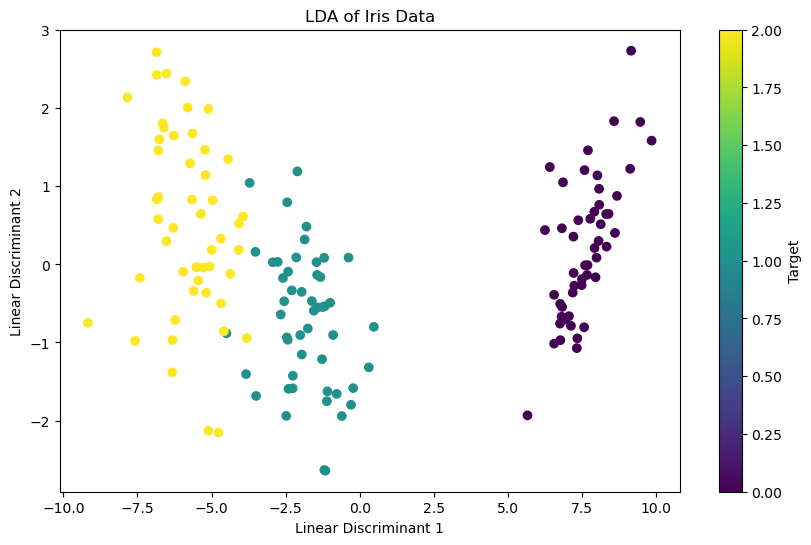

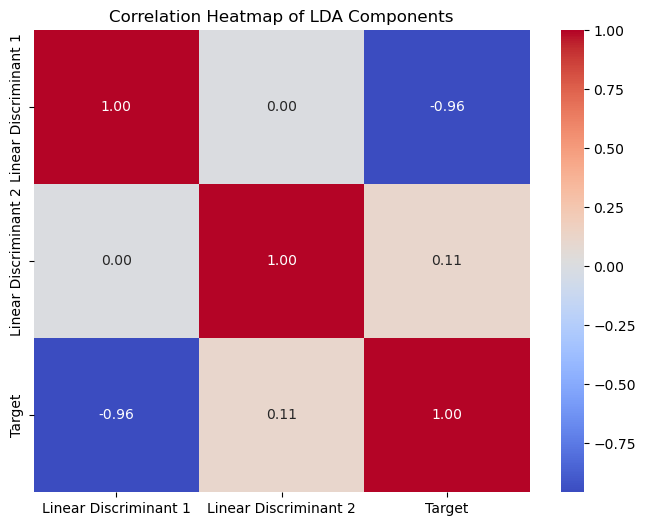

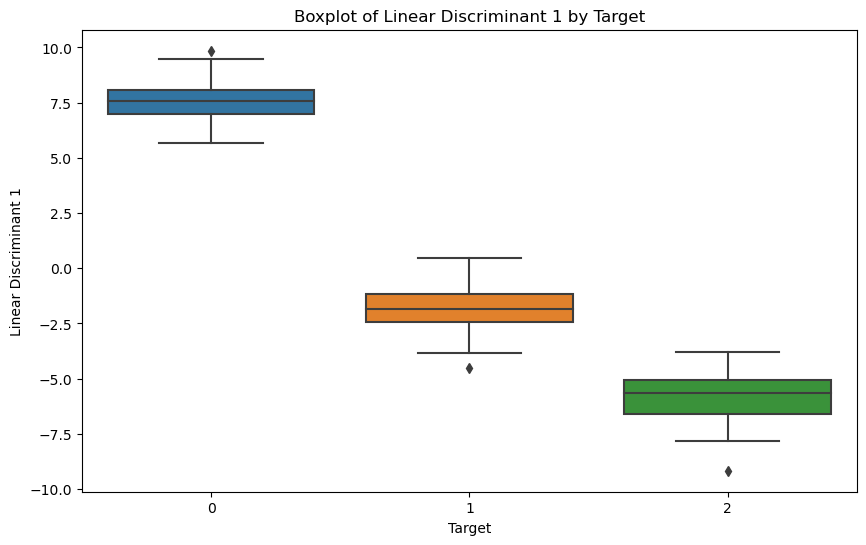

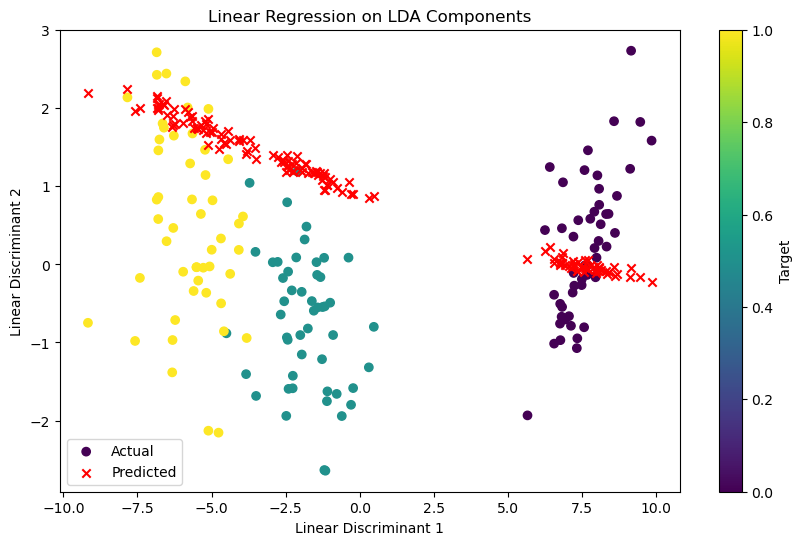

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['TARGET'] = iris.target

# Explore the dataset
print("Dataset overview:")
print(data.head())

# Split the data into features (X) and target variable (y)
X = data.drop('TARGET', axis=1)
y = data['TARGET']

# Perform linear regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict and evaluate the linear regression model
y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("\nLinear Regression Mean Squared Error:", mse)

# Perform LDA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

# Plot LDA results
plt.figure(figsize=(10, 6))
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap='viridis')
plt.title('LDA of Iris Data')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.colorbar(label='Target')
plt.show()

# Heatmap of LDA components
lda_df = pd.DataFrame(X_lda, columns=['Linear Discriminant 1', 'Linear Discriminant 2'])
lda_df['Target'] = y
plt.figure(figsize=(8, 6))
sns.heatmap(lda_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of LDA Components')
plt.show()

# Boxplot of LDA components
plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y='Linear Discriminant 1', data=lda_df)
plt.title('Boxplot of Linear Discriminant 1 by Target')
plt.show()

# Linear regression on LDA components
lr_lda = LinearRegression()
lr_lda.fit(X_lda, y)
y_lda_pred = lr_lda.predict(X_lda)

plt.figure(figsize=(10, 6))
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap='viridis', label='Actual')
plt.scatter(X_lda[:, 0], y_lda_pred, c='red', label='Predicted', marker='x')
plt.title('Linear Regression on LDA Components')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.colorbar(label='Target')
plt.legend()
plt.show()
